# Evaluation of learning and final policies

In [1]:
from os import makedirs
from os.path import join, abspath
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import torch as pt
from ppo_data_loader import *
from plot_results_pinball import *
from compare_pressure_fields import load_pressure_fields

plt.rcParams["figure.dpi"] = 340
plt.rcParams["text.usetex"] = True
root = abspath("..")
cylinder_out = join(root, "plots", "rotatingCylinder2D")
pinball_out = join(root, "plots", "rotatingPinball2D")
makedirs(cylinder_out, exist_ok=True)
makedirs(pinball_out, exist_ok=True)

Refer to the installation instructions at https://github.com/FlowModelingControl/flowtorch
If you are not using the TecplotDataloader, ignore this warning.


## Cylinder
### Loading and averaging

In [2]:
setup = {
    "load_path": join(root, "data", "rotatingCylinder2D"),
    "case_name": ["e200_r10_b10_f8_MF", "e200_r10_b10_f8_MB_1model", "e200_r10_b10_f8_MB_5models_thr3",
                  "e200_r10_b10_f8_MB_5models_thr2", "e200_r10_b10_f8_MB_10models_thr5",
                  "e200_r10_b10_f8_MB_10models_thr3"],
    "mark_e_cfd": True
}
# load and accumulate data
all_data = load_all_data(setup)
# average the trajectories over all seeds and wrt to episodes
averaged_data = average_results_for_each_case(all_data)

found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found 1 failed trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories
found no invalid trajectories


In [3]:
# print info amount CFD episodes, assuming 1st case is MF
for i in range(len(averaged_data["MF_episodes"])):
    print(f"{averaged_data['MF_episodes'][i]} CFD episodes for case {i}")

[200, 200, 200, 200, 200] CFD episodes for case 0
[50, 50, 50, 50, 50] CFD episodes for case 1
[55, 52, 50, 53, 54] CFD episodes for case 2
[34, 31, 33, 27, 27] CFD episodes for case 3
[50, 50, 48, 49, 49] CFD episodes for case 4
[11, 12, 15, 14, 10] CFD episodes for case 5


### Rewards

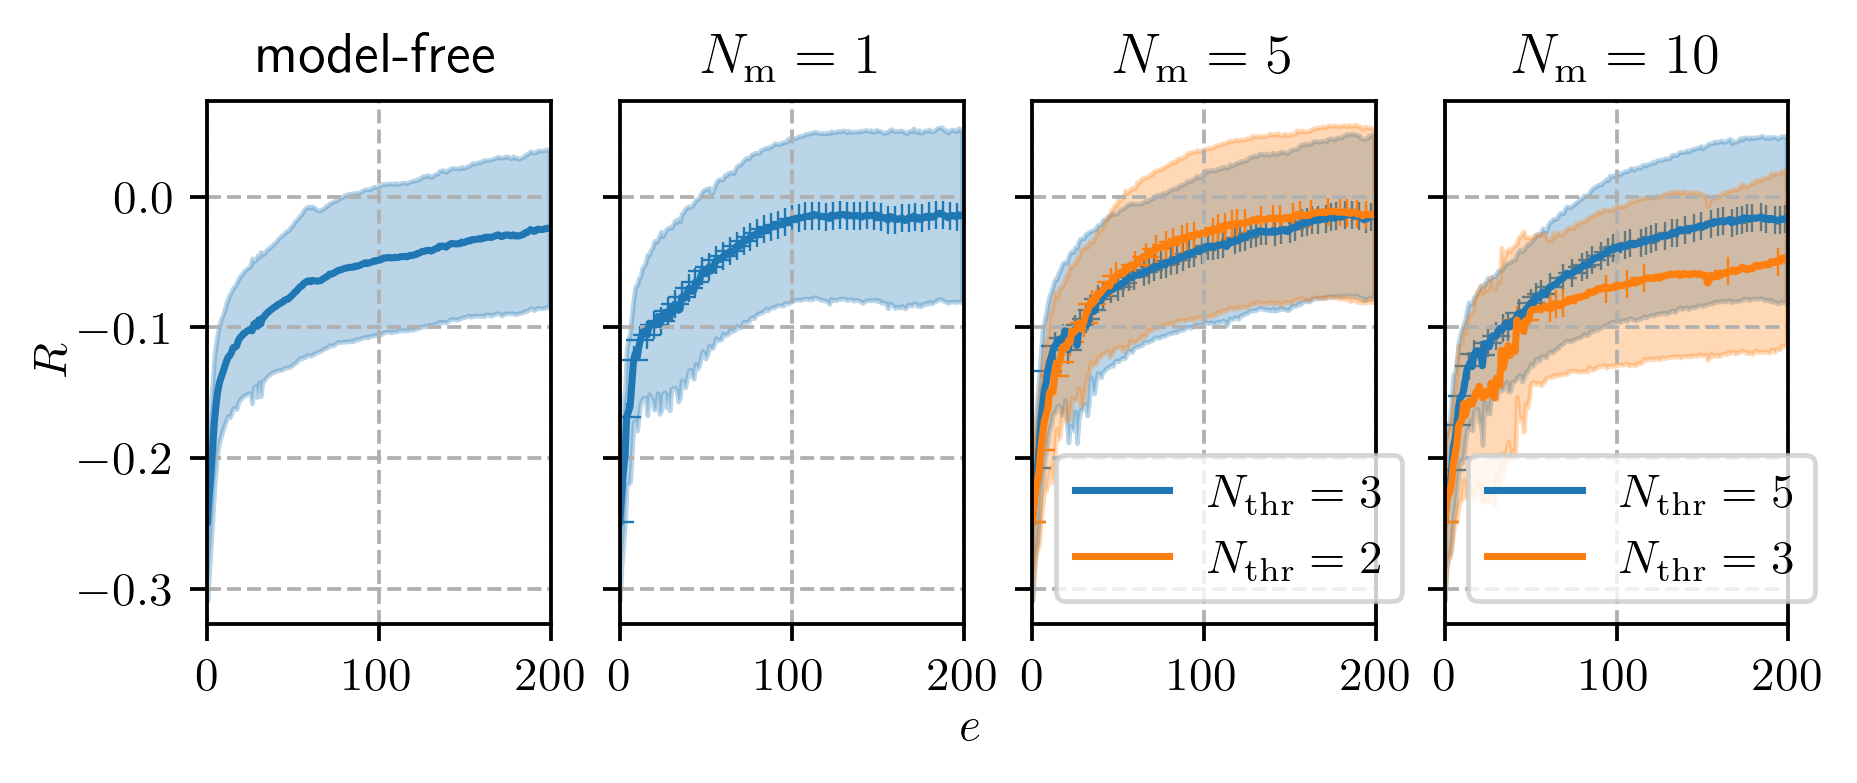

In [4]:
fig, axarr = plt.subplots(1, 4, figsize=(6, 2), sharex=True, sharey=True)

ep = range(200)
used_cfd = [[i for i in ep if i not in case[0]] for case in averaged_data["e_number_mb"]]

# model free
mean, std = averaged_data["mean_rewards"][0], averaged_data["std_rewards"][0]
axarr[0].plot(ep, mean, c="C0", ls="-")
axarr[0].fill_between(ep, mean-std, mean+std, color="C0", alpha=0.3)
axarr[0].set_title("model-free")

# 1 model
mean, std = averaged_data["mean_rewards"][1], averaged_data["std_rewards"][1]
axarr[1].fill_between(ep, mean-std, mean+std, color="C0", alpha=0.3)
axarr[1].plot(ep, mean, c="C0", ls="-")
axarr[1].set_title(r"$N_\mathrm{m}=1$")
cfd_ep = pt.tensor(used_cfd[1], dtype=pt.int64)
axarr[1].scatter(cfd_ep, mean[cfd_ep], marker="+", lw=0.5, c="C0")

# 5 models
mean, std = averaged_data["mean_rewards"][2], averaged_data["std_rewards"][2]
axarr[2].fill_between(ep, mean-std, mean+std, color="C0", alpha=0.3)
axarr[2].plot(ep, mean, c="C0", ls="-", label=r"$N_\mathrm{thr}=3$")
cfd_ep = pt.tensor(used_cfd[2], dtype=pt.int64)
axarr[2].scatter(cfd_ep, mean[cfd_ep], marker="+", lw=0.5, c="C0")
mean, std = averaged_data["mean_rewards"][3], averaged_data["std_rewards"][3]
axarr[2].fill_between(ep, mean-std, mean+std, color="C1", alpha=0.3)
axarr[2].plot(ep, mean, c="C1", ls="-", label=r"$N_\mathrm{thr}=2$")
cfd_ep = pt.tensor(used_cfd[3], dtype=pt.int64)
axarr[2].scatter(cfd_ep, mean[cfd_ep], marker="+", lw=0.5, c="C1")
axarr[2].legend()
axarr[2].set_title(r"$N_\mathrm{m}=5$")

# 10 models
mean, std = averaged_data["mean_rewards"][4], averaged_data["std_rewards"][4]
axarr[3].fill_between(ep, mean-std, mean+std, color="C0", alpha=0.3)
axarr[3].plot(ep, mean, c="C0", ls="-", label=r"$N_\mathrm{thr}=5$")
cfd_ep = pt.tensor(used_cfd[4], dtype=pt.int64)
axarr[3].scatter(cfd_ep, mean[cfd_ep], marker="+", lw=0.5, c="C0")
mean, std = averaged_data["mean_rewards"][5], averaged_data["std_rewards"][5]
axarr[3].fill_between(ep, mean-std, mean+std, color="C1", alpha=0.3)
axarr[3].plot(ep, mean, c="C1", ls="-", label=r"$N_\mathrm{thr}=3$")
cfd_ep = pt.tensor(used_cfd[5], dtype=pt.int64)
axarr[3].scatter(cfd_ep, mean[cfd_ep], marker="+", lw=0.5, c="C1")
axarr[3].legend()
axarr[3].set_title(r"$N_\mathrm{m}=10$")

axarr[0].set_xlim(0, 200)
for ax in axarr:
    ax.grid(ls="--")
    
fig.text(0.5, -0.06, r"$e$", ha='center')
fig.text(0.04, 0.5, r"$R$", va='center', rotation='vertical')
plt.savefig(join(cylinder_out, "rewards_vs_episode.pdf"), bbox_inches="tight")

### Evaluation of best policy

In [5]:
uncontrolled = pd.read_csv(
    join(setup["load_path"], "uncontrolled", "postProcessing", "forces", "0", "coefficient.dat"),
    skiprows=13, header=0, sep=r"\s+", usecols=[0, 1, 2], names=["t", "cd", "cl"]
)
uncontrolled.head()

,t,cd,cl
0,0.0010,7.978903,0.015587
1,0.0015,7.012691,-0.006190
2,0.0020,6.452758,-0.001203
3,0.0025,6.047651,-0.000361
4,0.0030,5.702248,-0.002485


In [6]:
controlled, traj = [], []
for case in setup["case_name"]:
    # get the path to the results using the final policy
    load_path = glob(join(setup["load_path"], case, "*", "results_best_policy"))[0]
    # load force coefficients
    controlled.append(
        pd.read_csv(
            join(load_path, "postProcessing", "forces", "0", "coefficient.dat"),
            skiprows=13, header=0, sep=r"\s+", usecols=[0, 1, 2], names=["t", "cd", "cl"]
        )
    )
    # load the trajectories of the alpha, beta and omega wrt t
    traj.append(
        pd.read_csv(
            join(load_path, "trajectory.csv"),
            header=0, sep=r",", usecols=[0, 1, 2, 3], names=["t", "omega", "alpha", "beta"]
        )
    )

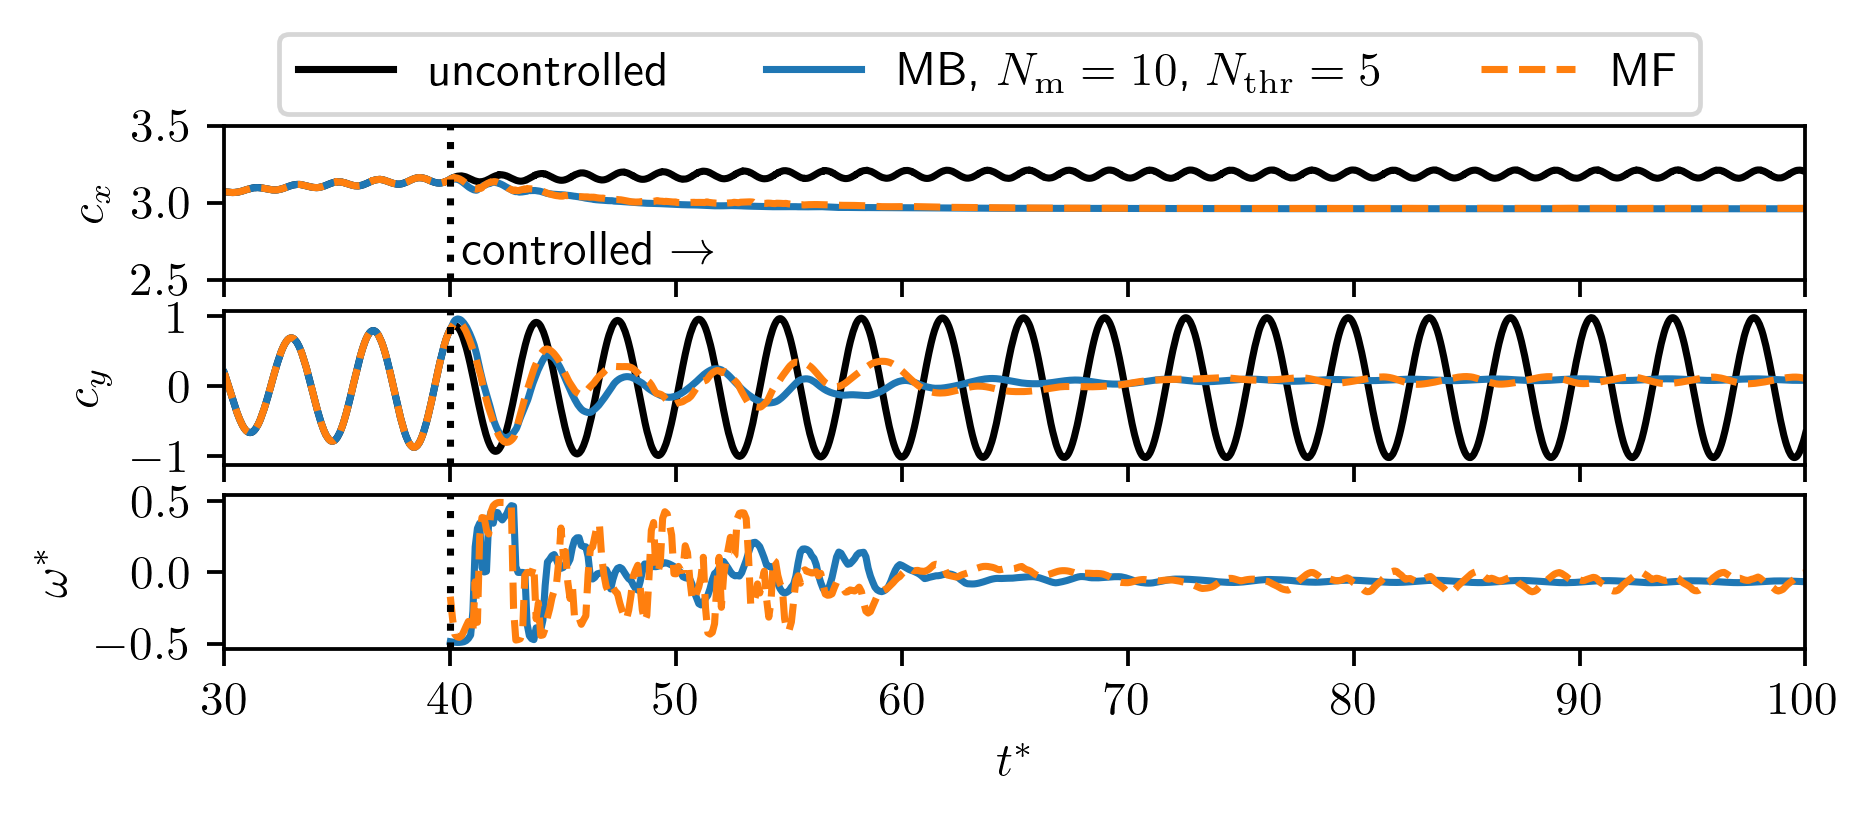

In [7]:
fig, axarr = plt.subplots(3, figsize=(6, 2), sharex=True)

axarr[0].plot(uncontrolled.t*10, uncontrolled.cd, c="k", label="uncontrolled")
axarr[0].plot(controlled[4].t*10, controlled[4].cd, c="C0", label=r"MB, $N_\mathrm{m}=10$, $N_\mathrm{thr}=5$") # 10 models
axarr[0].plot(controlled[0].t*10, controlled[0].cd, c="C1", ls="--", label="MF") # model-free
axarr[0].set_xlim(30, 100)
axarr[0].set_ylim(2.5, 3.5)
axarr[0].set_ylabel(r"$c_x$")
axarr[0].text(40.5, 2.6, r"controlled $\rightarrow$")
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=3)
axarr[1].plot(uncontrolled.t*10, uncontrolled.cl, c="k")
axarr[1].plot(controlled[4].t*10, controlled[4].cl, c="C0") # 10 models
axarr[1].plot(controlled[0].t*10, controlled[0].cl, c="C1", ls="--") # model-free
axarr[1].set_ylabel(r"$c_y$")

axarr[2].plot(traj[4].t*10, traj[4].omega/10, c="C0") # 10 models
axarr[2].plot(traj[0].t*10, traj[0].omega/10, c="C1", ls="--") # model-free
axarr[2].set_ylabel(r"$\omega^\ast$")
axarr[2].set_xlabel(r"$t^\ast$")

for ax in axarr:
    ax.axvline(40, ls=":", c="k")

plt.savefig(join(cylinder_out, "omega_best_policy.pdf"), bbox_inches="tight")

In [8]:
cases_cylinder = [
    "uncontrolled",
    join("e200_r10_b10_f8_MF", "seed4", "results_best_policy"),
    join("e200_r10_b10_f8_MB_10models_thr5", "seed0", "results_best_policy")
]
# load the CFD data (here only the field required) and compute mean and std. deviation wrt time
pressure, coordinates = zip(*[load_pressure_fields(join(setup["load_path"], c)) for c in cases_cylinder])

/tmp/ipykernel_11126/1574281262.py:16: UserWarning: No contour levels were found within the data range.
  axarr[i, 1].tricontour(coord[:, 0], coord[:, 1], pi_std, levels=p_std_levels, vmin=p_std_min, vmax=p_std_max, extend="both", colors="k", linewidths=0.5)


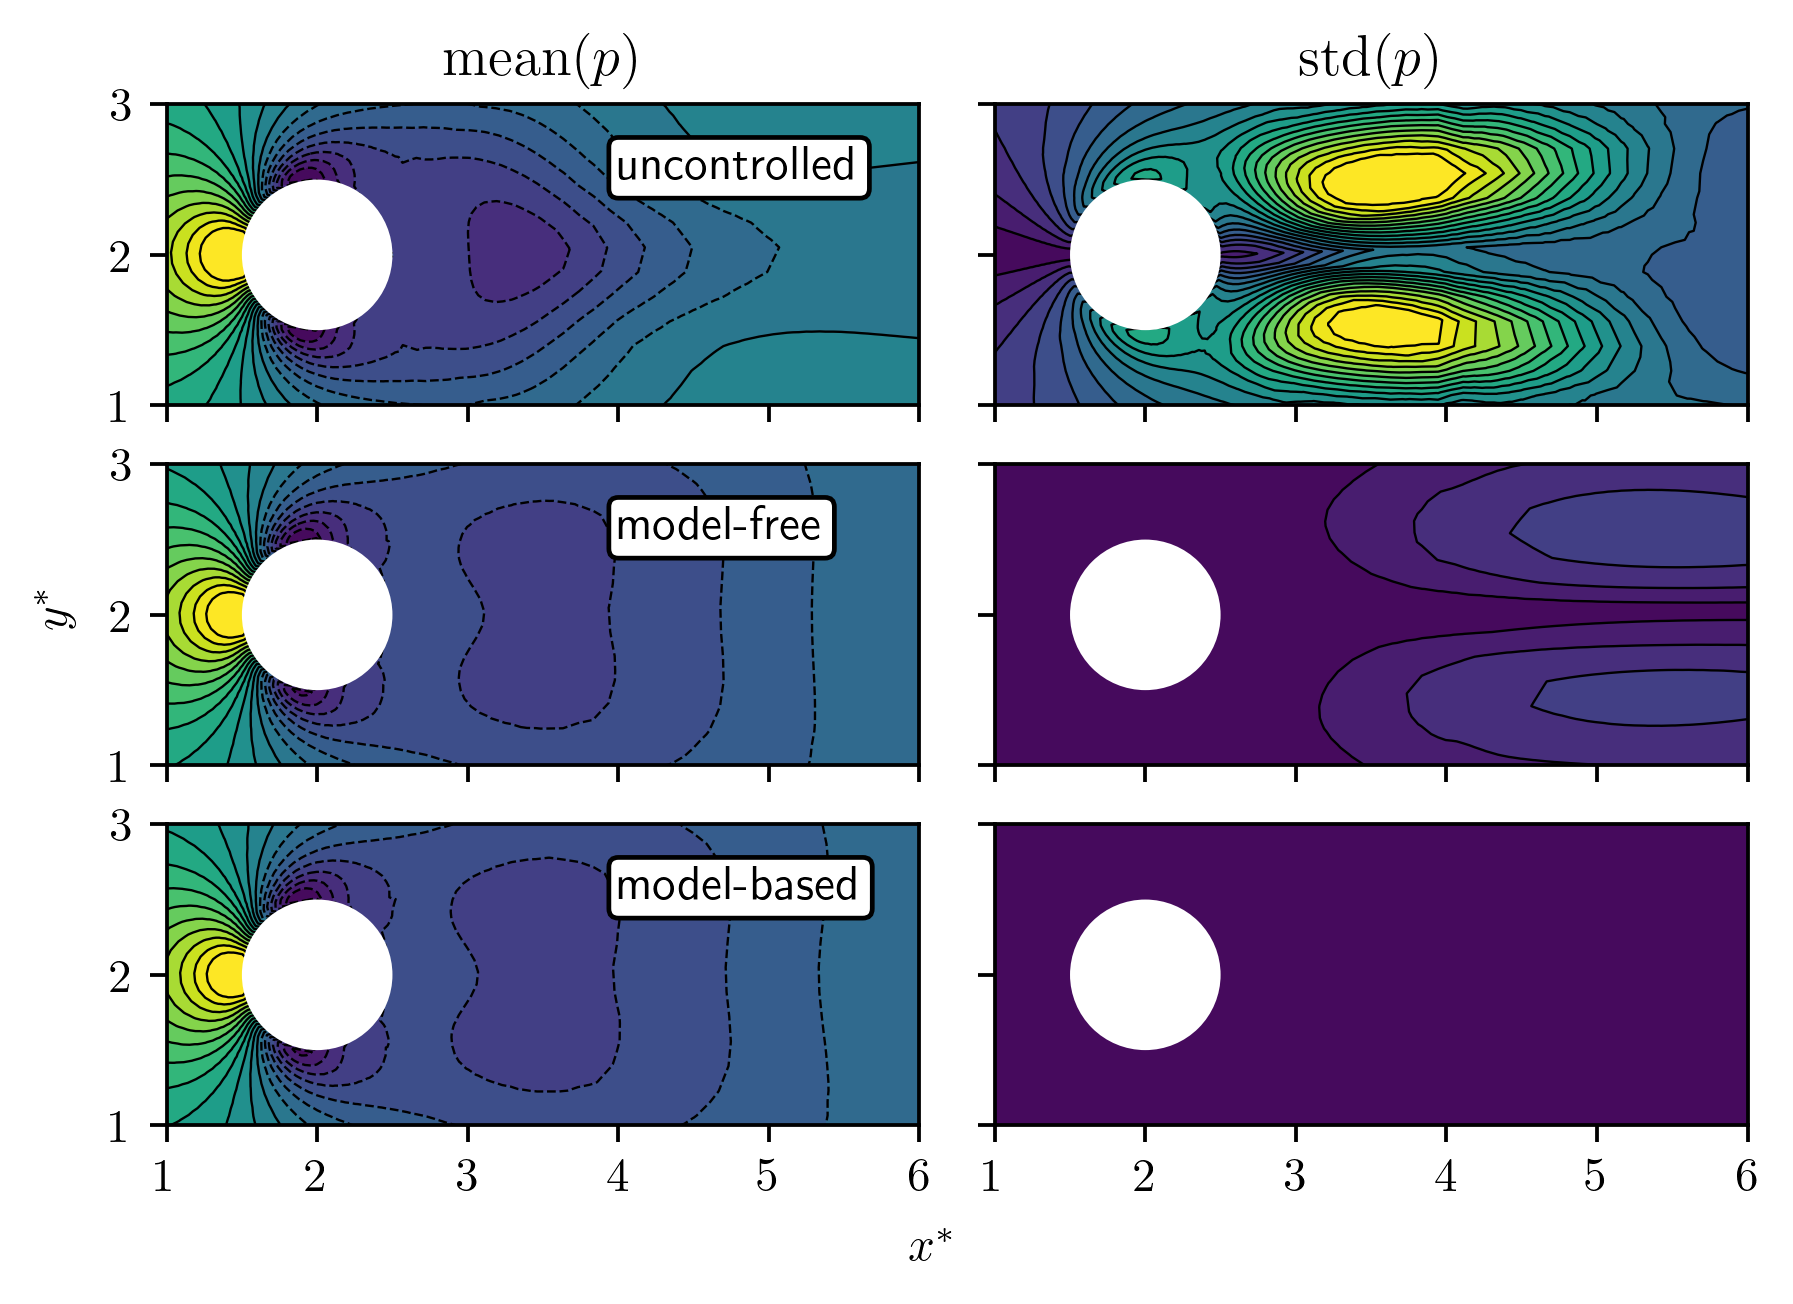

In [9]:
fig, axarr = plt.subplots(3, 2, figsize=(6, 4), sharex=True, sharey=True)

p_mean = [p.mean(dim=1) for p in pressure]
p_max, p_min = 0.8*max([p.max().item() for p in p_mean]), min([p.min().item() for p in p_mean])
p_std = [p.std(dim=1) for p in pressure]
p_std_max, p_std_min = 0.9*max([p.max().item() for p in p_std]), 0.9*min([p.min().item() for p in p_std])
p_levels = pt.linspace(p_min, p_max, 20)
p_std_levels = pt.linspace(p_std_min, p_std_max, 20)
d = 0.1

for i, (pi_mean, pi_std) in enumerate(zip(p_mean, p_std)):
    coord = coordinates[i]/d
    axarr[i, 0].tricontourf(coord[:, 0], coord[:, 1], pi_mean, levels=p_levels, vmin=p_min, vmax=p_max, extend="both")
    axarr[i, 0].tricontour(coord[:, 0], coord[:, 1], pi_mean, levels=p_levels, vmin=p_min, vmax=p_max, extend="both", colors="k", linewidths=0.5)
    axarr[i, 1].tricontourf(coord[:, 0], coord[:, 1], pi_std, levels=p_std_levels, vmin=p_std_min, vmax=p_std_max, extend="both")
    axarr[i, 1].tricontour(coord[:, 0], coord[:, 1], pi_std, levels=p_std_levels, vmin=p_std_min, vmax=p_std_max, extend="both", colors="k", linewidths=0.5)
    
for ax in axarr.flatten():
    ax.set_aspect("equal")
    ax.set_xlim(0.1/d, 0.6/d)
    ax.set_ylim(0.1/d, 0.3/d)
    ax.add_patch(Circle((0.2/d, 0.2/d), 0.5, facecolor="white", zorder=6))
    
axarr[0, 0].set_title(r"$\mathrm{mean}(p)$")
axarr[0, 1].set_title(r"$\mathrm{std}(p)$")
axarr[0, 0].text(4, 2.5, "uncontrolled", color="k", bbox=dict(facecolor="w", edgecolor="k", boxstyle="round,pad=0.2"))
axarr[1, 0].text(4, 2.5, "model-free", color="k", bbox=dict(facecolor="w", edgecolor="k", boxstyle="round,pad=0.2"))
axarr[2, 0].text(4, 2.5, r"model-based", color="k", bbox=dict(facecolor="w", edgecolor="k", boxstyle="round,pad=0.2"))
    
fig.text(0.5, 0.02, r"$x^\ast$", ha='center')
fig.text(0.06, 0.5, r"$y^\ast$", va='center', rotation='vertical')
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.savefig(join(cylinder_out, "comparison_pressure_fields.png"), bbox_inches="tight")

## Pinball
### Loading and averaging

In [10]:
load_path = join(root, "data", "rotatingPinball2D")
case_name = ["e150_r10_b10_f300_MF", "e150_r10_b10_f300_MB_1model", "e150_r10_b10_f300_MB_5models_thr2",
             "e150_r10_b10_f300_MB_10models_thr5"]
results = [load_rewards(join(load_path, c, "seed0")) for c in case_name]
results = resort_results(results)

In [11]:
for i, e in enumerate(results["MF_episodes"]):
        print(f"found {len(e)} CFD episodes (= {round(len(e) / len(results['rewards_mean'][i]) * 100, 2)} %)")

found 150 CFD episodes (= 100.0 %)
found 38 CFD episodes (= 25.33 %)
found 30 CFD episodes (= 20.0 %)
found 38 CFD episodes (= 25.33 %)


### Rewards

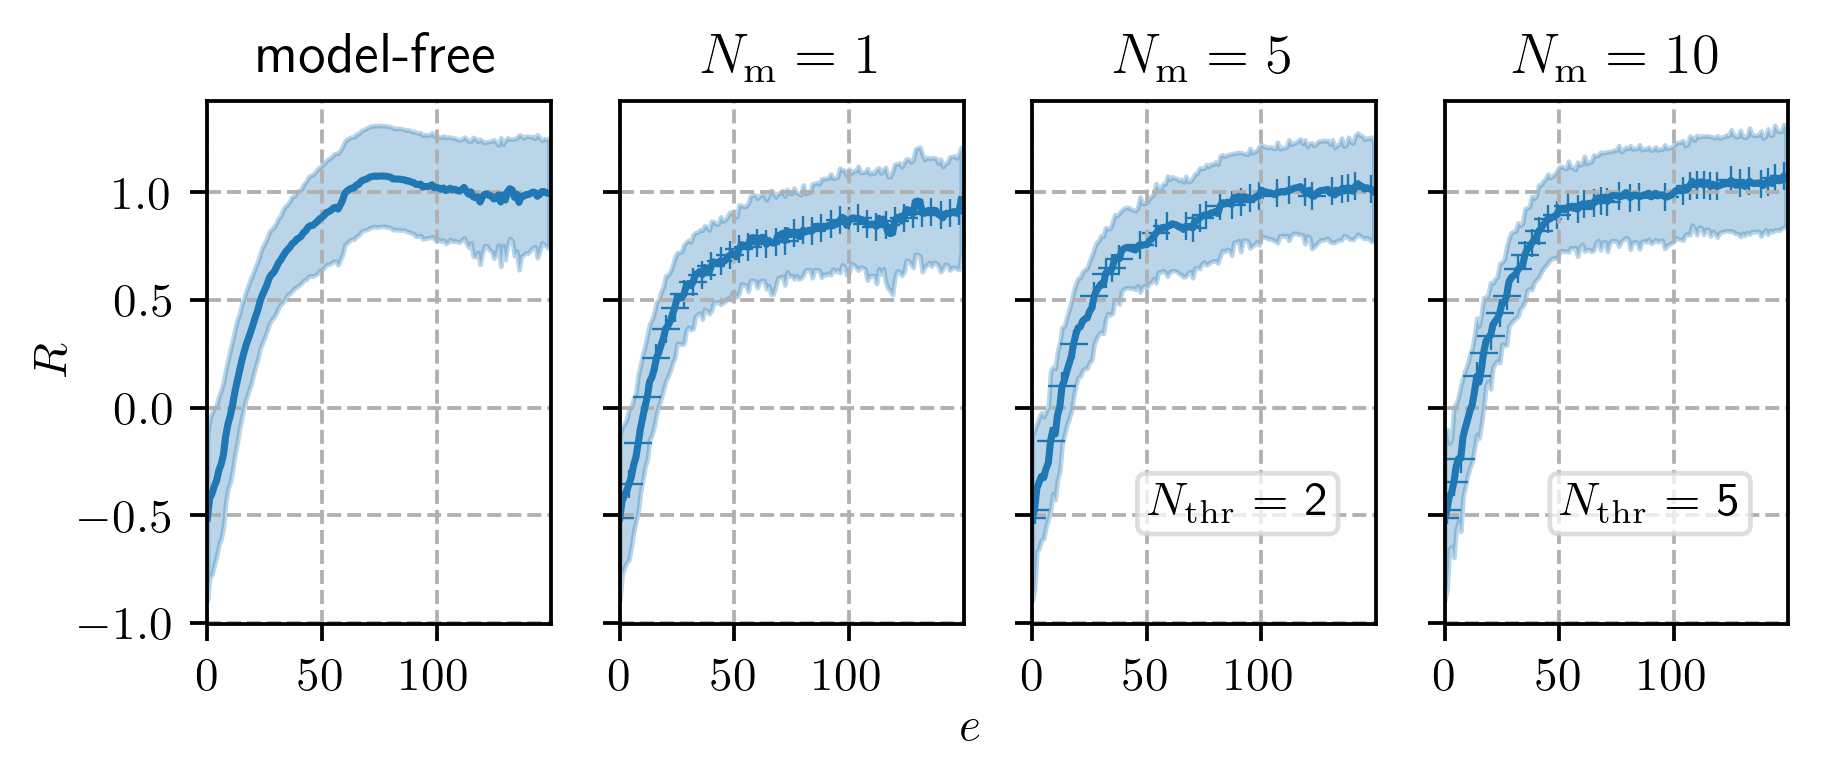

In [12]:
fig, axarr = plt.subplots(1, 4, figsize=(6, 2), sharex=True, sharey=True)

ep = range(150)
used_cfd = results["MF_episodes"]

# model free
mean, std = results["rewards_mean"][0], results["rewards_std"][0]
axarr[0].plot(ep, mean, c="C0", ls="-")
axarr[0].fill_between(ep, mean-std, mean+std, color="C0", alpha=0.3)
axarr[0].set_title("model-free")

# 1 model
mean, std = results["rewards_mean"][1], results["rewards_std"][1]
axarr[1].fill_between(ep, mean-std, mean+std, color="C0", alpha=0.3)
axarr[1].plot(ep, mean, c="C0", ls="-")
axarr[1].set_title(r"$N_\mathrm{m}=1$")
cfd_ep = pt.tensor(used_cfd[1], dtype=pt.int64)
axarr[1].scatter(cfd_ep, mean[cfd_ep], marker="+", lw=0.5, c="C0")

# 5 models
mean, std = results["rewards_mean"][2], results["rewards_std"][2]
axarr[2].fill_between(ep, mean-std, mean+std, color="C0", alpha=0.3)
axarr[2].plot(ep, mean, c="C0", ls="-", label=r"$N_\mathrm{thr}=2$")
cfd_ep = pt.tensor(used_cfd[2], dtype=pt.int64)
axarr[2].scatter(cfd_ep, mean[cfd_ep], marker="+", lw=0.5, c="C0")
axarr[2].set_title(r"$N_\mathrm{m}=5$")
axarr[2].text(50, -0.5, r"$N_\mathrm{thr}$ = 2", bbox=dict(facecolor="w", edgecolor="lightgray", boxstyle="round,pad=0.2", alpha=0.75))

# 10 models
mean, std = results["rewards_mean"][3], results["rewards_std"][3]
axarr[3].fill_between(ep, mean-std, mean+std, color="C0", alpha=0.3)
axarr[3].plot(ep, mean, c="C0", ls="-", label=r"$N_\mathrm{thr}=5$")
cfd_ep = pt.tensor(used_cfd[3], dtype=pt.int64)
axarr[3].scatter(cfd_ep, mean[cfd_ep], marker="+", lw=0.5, c="C0")
axarr[3].set_title(r"$N_\mathrm{m}=10$")
axarr[3].text(50, -0.5, r"$N_\mathrm{thr}$ = 5", bbox=dict(facecolor="w", edgecolor="lightgray", boxstyle="round,pad=0.2", alpha=0.75))

axarr[0].set_xlim(0, 150)
for ax in axarr:
    ax.grid(ls="--")
    ax.set_xticks([0, 50, 100])
    
fig.text(0.5, -0.06, r"$e$", ha='center')
fig.text(0.04, 0.5, r"$R$", va='center', rotation='vertical')
plt.savefig(join(pinball_out, "rewards_vs_episode.pdf"), bbox_inches="tight")

### Evaluation of best policy

In [13]:
# get the sum of cd and cl values for all cases
uncontrolled = pd.read_csv(join(load_path, "uncontrolled", "postProcessing", "forces", "0", "coefficient.dat"),
                           skiprows=12, header=0, sep=r"\s+", usecols=[0, 1, 2], names=["t", "cd", "cl"])
# then load the sum of cl and cd values for the controlled cases
controlled = []
for case in case_name:
    # load the trajectories of the cl and cd coefficients
    controlled.append(pd.read_csv(join(load_path, case, "results_final_policy", "postProcessing", "forces", "0","coefficient.dat"),
                                  skiprows=12, header=0, sep=r"\s+", usecols=[0, 1, 2], names=["t", "cd", "cl"]))
omega = [pd.read_csv(join(load_path, c, "results_final_policy", "trajectory.csv"), sep=r",") for c in case_name]

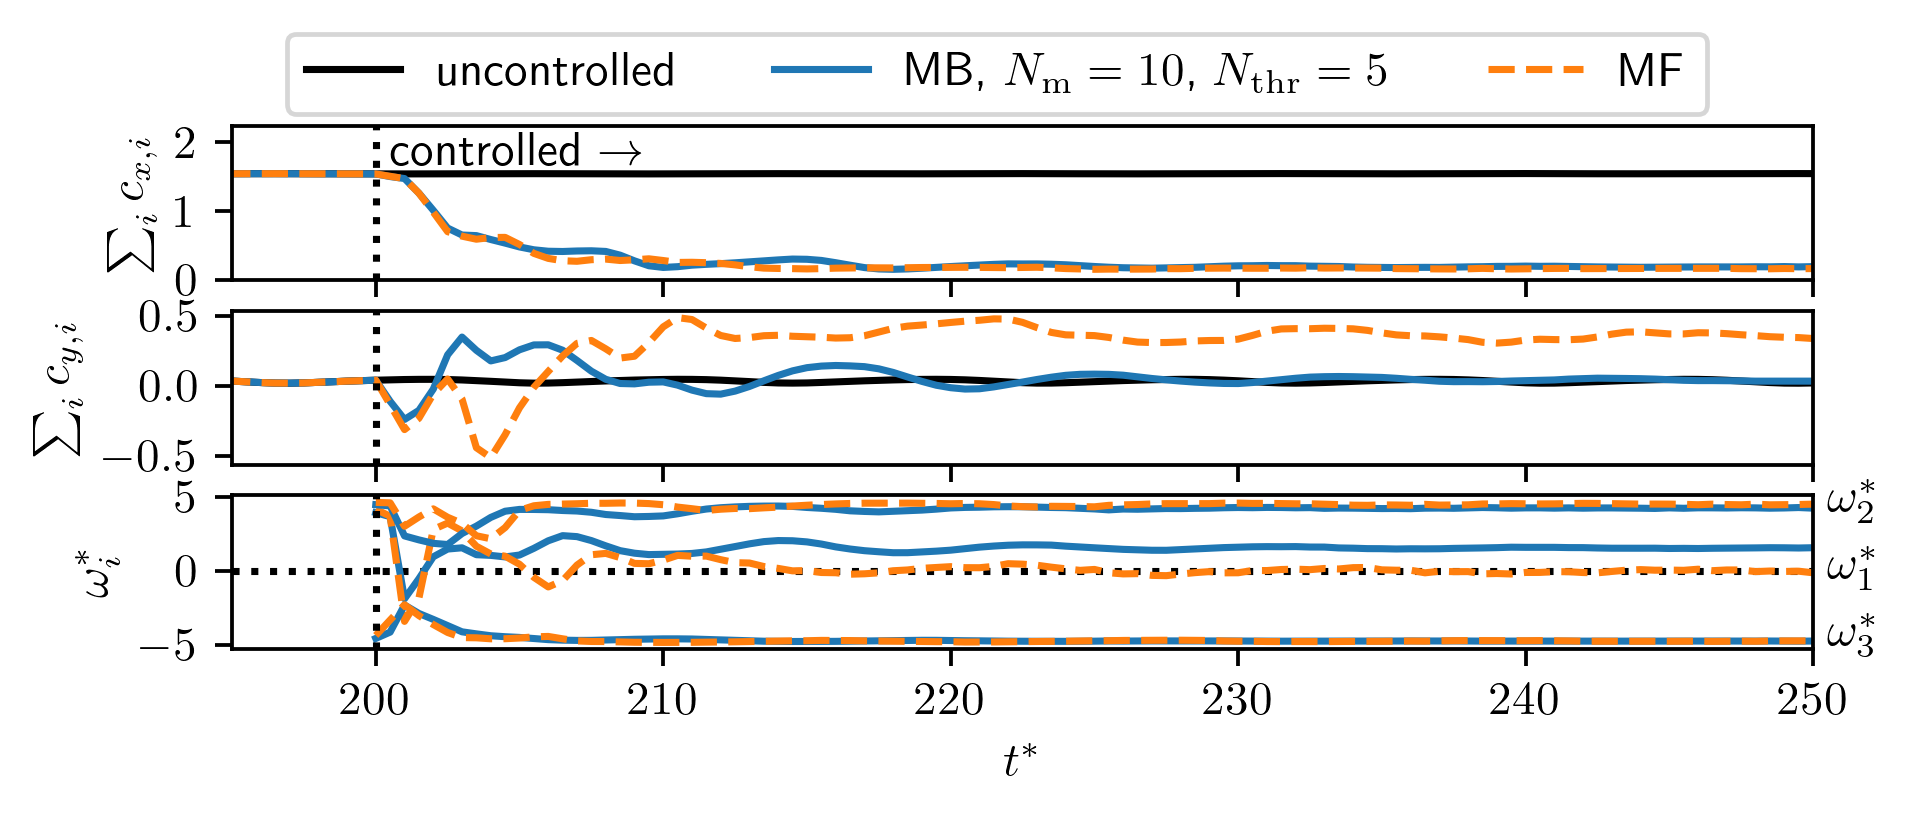

In [14]:
fig, axarr = plt.subplots(3, figsize=(6, 2), sharex=True)

axarr[0].plot(uncontrolled.t, uncontrolled.cd, c="k", label="uncontrolled")
axarr[0].plot(controlled[3].t, controlled[3].cd, c="C0", label=r"MB, $N_\mathrm{m}=10$, $N_\mathrm{thr}=5$") # 10 models
axarr[0].plot(controlled[0].t, controlled[0].cd, c="C1", ls="--", label="MF") # model-free
axarr[0].set_xlim(195, 250)
axarr[0].set_ylabel(r"$\sum_i c_{x,i}$")
axarr[0].text(200.5, 1.65, r"controlled $\rightarrow$")
axarr[0].set_yticks([0, 1.0, 2])
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=3)
axarr[1].plot(uncontrolled.t, uncontrolled.cl, c="k")
axarr[1].plot(controlled[3].t, controlled[3].cl, c="C0") # 10 models
axarr[1].plot(controlled[0].t, controlled[0].cl, c="C1", ls="--") # model-free
axarr[1].set_ylabel(r"$\sum_i c_{y,i}$")

axarr[2].axhline(0, ls=":", c="k")
axarr[2].plot(omega[3].t, omega[3][" omega_a"], c="C0")
axarr[2].plot(omega[0].t, omega[0][" omega_a"], c="C1", ls="--")
axarr[2].plot(omega[3].t, omega[3][" omega_b"], c="C0")
axarr[2].plot(omega[0].t, omega[0][" omega_b"], c="C1", ls="--")
axarr[2].plot(omega[3].t, omega[3][" omega_c"], c="C0")
axarr[2].plot(omega[0].t, omega[0][" omega_c"], c="C1", ls="--")
axarr[2].set_ylabel(r"$\omega^\ast_i$")
axarr[2].set_xlabel(r"$t^\ast$")
axarr[2].text(250.5, -0.5, r"$\omega^\ast_1$")
axarr[2].text(250.5, 4, r"$\omega^\ast_2$")
axarr[2].text(250.5, -5, r"$\omega^\ast_3$")


for ax in axarr:
    ax.axvline(200, ls=":", c="k")

plt.savefig(join(pinball_out, "omega_best_policy.pdf"), bbox_inches="tight")

In [29]:
omega[3][" omega_a"][-10:].mean(), omega[3][" omega_b"][-10:].mean(), omega[3][" omega_c"][-10:].mean()

(1.537342866560664, -4.750969625442101, 4.243765539760824)

In [30]:
omega[0][" omega_a"][-10:].mean(), omega[0][" omega_b"][-10:].mean(), omega[0][" omega_c"][-10:].mean()

(-0.02908106965190303, -4.747171266192171, 4.502177024478785)

In [15]:
path_pinball = join("..", "data", "rotatingPinball2D")
cases_pinball = ["uncontrolled", join("e150_r10_b10_f300_MF", "results_final_policy"),
                 join("e150_r10_b10_f300_MB_10models_thr5", "results_final_policy")]
pressure, coordinates = zip(*[load_pressure_fields(join(path_pinball, c), start_time=350) for c in cases_pinball])

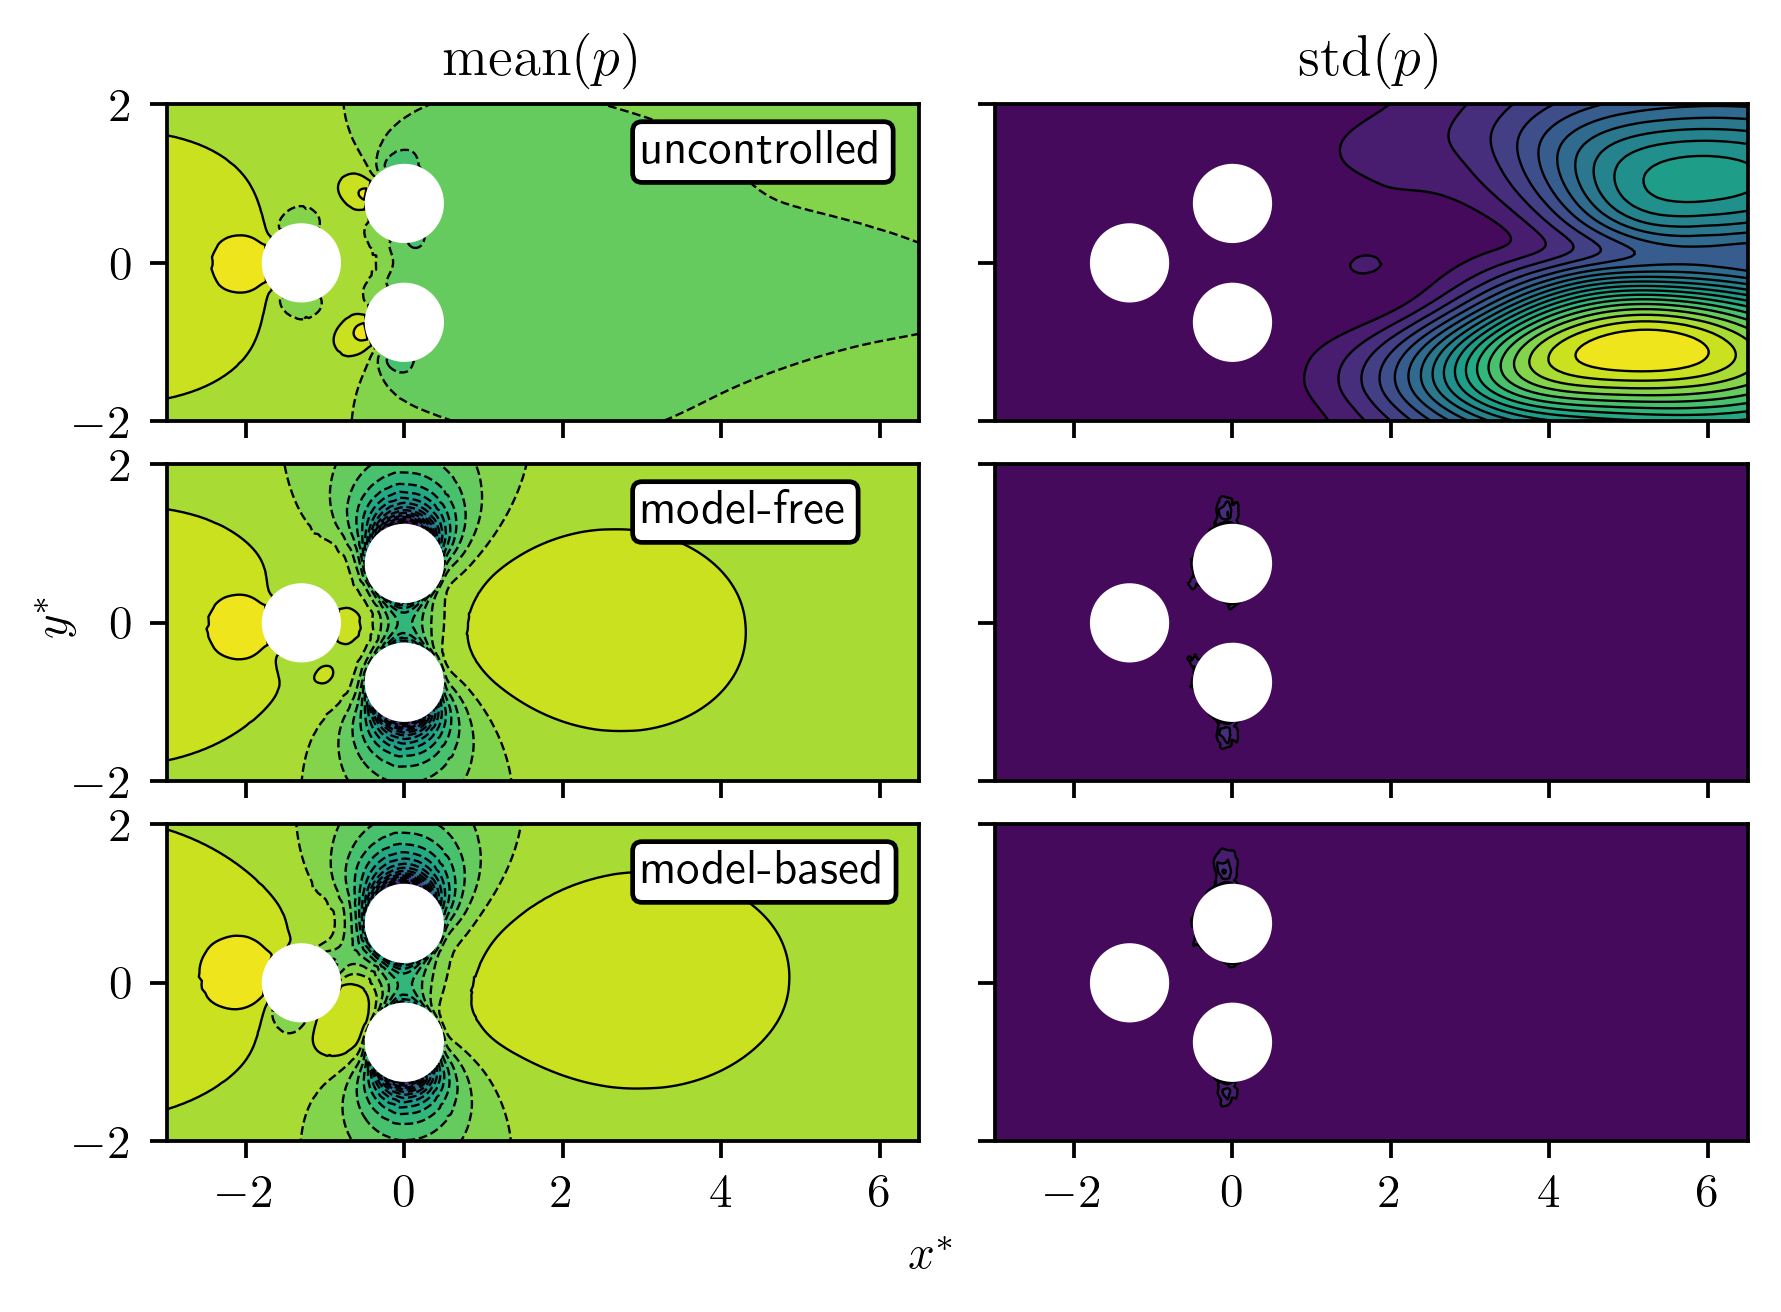

In [18]:
fig, axarr = plt.subplots(3, 2, figsize=(6, 4), sharex=True, sharey=True)

p_mean = [p.mean(dim=1) for p in pressure]
p_max, p_min = max([p.max().item() for p in p_mean]), min([p.min().item() for p in p_mean])
p_std = [p.std(dim=1) for p in pressure]
p_std_max, p_std_min = max([p.max().item() for p in p_std]), min([p.min().item() for p in p_std])
p_levels = pt.linspace(p_min, p_max, 20)
p_std_levels = pt.linspace(p_std_min, p_std_max, 20)
d = 1.0

for i, (pi_mean, pi_std) in enumerate(zip(p_mean, p_std)):
    coord = coordinates[i]/d
    axarr[i, 0].tricontourf(coord[:, 0], coord[:, 1], pi_mean, levels=p_levels, vmin=p_min, vmax=p_max, extend="both")
    axarr[i, 0].tricontour(coord[:, 0], coord[:, 1], pi_mean, levels=p_levels, vmin=p_min, vmax=p_max, extend="both", colors="k", linewidths=0.5)
    axarr[i, 1].tricontourf(coord[:, 0], coord[:, 1], pi_std, levels=p_std_levels, vmin=p_std_min, vmax=p_std_max, extend="both")
    axarr[i, 1].tricontour(coord[:, 0], coord[:, 1], pi_std, levels=p_std_levels, vmin=p_std_min, vmax=p_std_max, extend="both", colors="k", linewidths=0.5)
    
for ax in axarr.flatten():
    ax.set_aspect("equal")
    ax.set_xlim(-3*d, 6.5*d)
    ax.set_ylim(-2*d, 2*d)
    ax.add_patch(Circle((-1.299/d, 0), 0.5*d, facecolor="white", zorder=6))
    ax.add_patch(Circle((0, 0.75/d), 0.5*d, facecolor="white", zorder=6))
    ax.add_patch(Circle((0, -0.75*d), 0.5*d, facecolor="white", zorder=6))
    
axarr[0, 0].set_title(r"$\mathrm{mean}(p)$")
axarr[0, 1].set_title(r"$\mathrm{std}(p)$")
axarr[0, 0].text(3, 1.25, "uncontrolled", color="k", bbox=dict(facecolor="w", edgecolor="k", boxstyle="round,pad=0.2"))
axarr[1, 0].text(3, 1.25, "model-free", color="k", bbox=dict(facecolor="w", edgecolor="k", boxstyle="round,pad=0.2"))
axarr[2, 0].text(3, 1.25, "model-based", color="k", bbox=dict(facecolor="w", edgecolor="k", boxstyle="round,pad=0.2"))
    
fig.text(0.5, 0.02, r"$x^\ast$", ha='center')
fig.text(0.06, 0.5, r"$y^\ast$", va='center', rotation='vertical')
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.savefig(join(pinball_out, "comparison_pressure_fields.png"), bbox_inches="tight")